#Contradictory, My Dear Watson
Detecting contradiction and entailment in multilingual text using TPUs


https://www.kaggle.com/competitions/contradictory-my-dear-watson/overview


#Dataset Description:

The task at hand concerns Natural Language Inferencing (NLI), more especially text entailment. Participants create an NLI model that can identify sentences (0 for entailment, 1 for neutral, and 2 for contradiction) given pairs of sentences that each contain a premise and a hypothesis. The competition intends to investigate whether machines are capable of efficiently identifying logical connections between phrases, which has important ramifications for text analysis, fact-checking, and the detection of fake news.

For this challenge, a dataset with text in fifteen different languages is offered. The task at hand is to create models that, in a variety of linguistic settings, can reliably anticipate the connection labels between pairs of premises and hypotheses. In order to effectively tackle this NLP problem, participants are advised to make use of the potent hardware accelerators known as Tensor Processing Units (TPUs).


A unique identifier for each data instance, {premise} (the first text serving as a basis for comparison), `hypothesis} (the second text being compared to the premise), `lang_abv} (language abbreviation), `language} (full language name), and `label} (the label indicating the logical relationship between the premise and hypothesis) are among the columns that make up the dataset. The values of 0, 1, or 2 for the {label} represent entailment, neutrality, and contradiction, respectively.

This multilingual dataset provides a real-world scenario where NLI models must handle a variety of linguistic patterns and relationships.


#Goal:

This project's main objective is to create reliable NLI models that can correctly anticipate the logical connections between text pairings in a variety of languages. This entails integrating TensorFlow's high-level API with Keras to create at least five machine learning algorithms/models, with the necessary inclusion of a neural network model (ANN, CNN, or RNN). The project also calls for extensive model evaluation, hyperparameter adjustment, and dimension reduction or feature selection strategies.

To comprehend label distributions and language trends, participants are encouraged to perform data analysis. The study should offer insights into model performance, possible difficulties, and any noteworthy patterns found in the dataset. The resulting models should be able to handle the subtleties of multilingual text entailment. Participants are required to provide predictions in the prescribed CSV format for a test set of 5195 entries. The submission is assessed based on accuracy.

#Train_Data

In [ ]:
import pandas as pd
train_data=pd.read_csv('/content/train.csv')

train_data

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


The dataset comprises 12,120 instances with six columns, including 'id,' 'premise,' 'hypothesis,' 'lang_abv,' 'language,' and 'label.' Each entry represents a pair of text sequences, denoted as the premise and hypothesis, accompanied by language information and a label indicating the logical relationship between the two texts. The 'lang_abv' column provides language abbreviations, such as 'en' for English, 'fr' for French, and 'th' for Thai. The 'label' column assigns numerical values (0, 1, or 2) to signify entailment, contradiction, or a neutral relationship between the premise and hypothesis. For instance, the first entry in English (en) indicates no contradiction (label 0), while the second entry in English depicts a contradiction (label 2) between the practice groups' permissibility and actual work undertaken. The dataset is diverse, spanning various languages and logical relationships, providing a rich source for natural language inferencing tasks.

#Test_Dataset

In [ ]:
test_data=pd.read_csv('/content/test.csv')
test_data

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
...,...,...,...,...,...
5190,5f90dd59b0,نیند نے وعدہ کیا کہ موٹل نے سوال میں تحقیق کی.,نیمیتھ کو موٹل کی تفتیش کے لئے معاوضہ دیا جارہ...,ur,Urdu
5191,f357a04e86,The rock has a soft texture and can be bough...,The rock is harder than most types of rock.,en,English
5192,1f0ea92118,她目前的存在，并考虑到他与沃佛斯顿争执的本质，那是尴尬的。,她在与Wolverstone的打斗结束后才在场的事实被看作是很尴尬的。,zh,Chinese
5193,0407b48afb,isn't it i can remember i've only been here ei...,I could see downtown Dallas from where I lived...,en,English


The dataset consists of 5,195 entries with five columns: 'id,' 'premise,' 'hypothesis,' 'lang_abv,' and 'language.' Each row represents a pair of text sequences, specifically the premise and hypothesis, along with language information. The language abbreviation ('lang_abv') provides a shorthand representation, such as 'ur' for Urdu, 'ar' for Arabic, 'fr' for French, 'zh' for Chinese, and 'ru' for Russian. The dataset encompasses diverse linguistic contexts, capturing a range of languages, including Urdu, Arabic, French, Chinese, Russian, and English. This multilingual dataset is designed for natural language inferencing tasks, aiming to predict logical relationships between pairs of text sequences in different languages. The premise and hypothesis variations across languages present a unique challenge for NLP models to accurately determine entailment, contradiction, or neutrality.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


The `train_data` DataFrame has 12,120 entries and 7 columns. The columns include 'id,' 'premise,' 'hypothesis,' 'lang_abv,' 'language,' 'label,' and 'label_encoded.' The data types consist of integers (`int64`) for the 'label' and 'label_encoded' columns, and objects for the remaining columns. The dataset does not contain any missing values, and the memory usage is approximately 662.9 KB.

In [ ]:
train_data.describe()

,label
count,12120.000000
mean,0.990759
std,0.824523
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


The descriptive statistics for the 'label' and 'label_encoded' columns in the `train_data` DataFrame indicate that the labels are distributed across three classes (0, 1, 2), with an average label value of approximately 0.99. The standard deviation is 0.82, reflecting some variation in the distribution, and the minimum and maximum label values are 0 and 2, respectively.

#Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
for n in train_data.columns:
 print("the values of ",n," are")
 print(pd.unique(train_data[n]))

the values of  id  are
['5130fd2cb5' '5b72532a0b' '3931fbe82a' ... '5085923e6c' 'fc8e2fd1fe'
 '44301dfb14']
the values of  premise  are
['and these comments were considered in formulating the interim rules.'
 'These are issues that we wrestle with in practice groups of law firms, she said. '
 "Des petites choses comme celles-là font une différence énorme dans ce que j'essaye de faire."
 ...
 'The center had become a hodgepodge of unconnected programs--a day-care center, a library, a nonviolence training school.'
 'ปีที่ผ่านมาเด็กที่ถูกทารุณกรรมและถูกละเลยมากกว่า 48,000 คนในรัฐนิวยอร์กถูกข่มขู่ทารุณกรรมทางอารมณ์ปฏิเสธการดูแลไม่เพียงพอและการดูแลที่เหมาะสม'
 'At the west end is a detailed model of the whole temple complex.']
the values of  hypothesis  are
['The rules developed in the interim were put together with these comments in mind.'
 'Practice groups are not permitted to work on these issues.'
 "J'essayais d'accomplir quelque chose." ...
 'It cannot be moved, now or ever.'
 'The mod

The `id` column contains unique identifiers for each data instance, ranging from '5130fd2cb5' to '44301dfb14'.

The `premise` column includes diverse textual statements, such as descriptions of rule formulation, discussions on law firm practice groups, and reflections in different languages.

The `hypothesis` column provides contrasting or related statements to the premises, involving considerations of interim rules, restrictions on practice group issues, and personal reflections in various languages.

The `lang_abv` column denotes language abbreviations, with values like 'en' for English, 'fr' for French, 'th' for Thai, and so forth.

The `language` column corresponds to the full names of the languages, such as 'English', 'French', 'Thai', and so on.

The `label` column contains numerical labels (0, 2, 1) indicating the logical relationships between premises and hypotheses: 0 for entailment, 2 for contradiction, and 1 for neutral.

 the dataset encompasses diverse textual data in multiple languages, with unique identifiers, language abbreviations, and labels specifying logical relationships between premise and hypothesis pairs.

In [ ]:
train_data.head(5)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


#Data Visualization

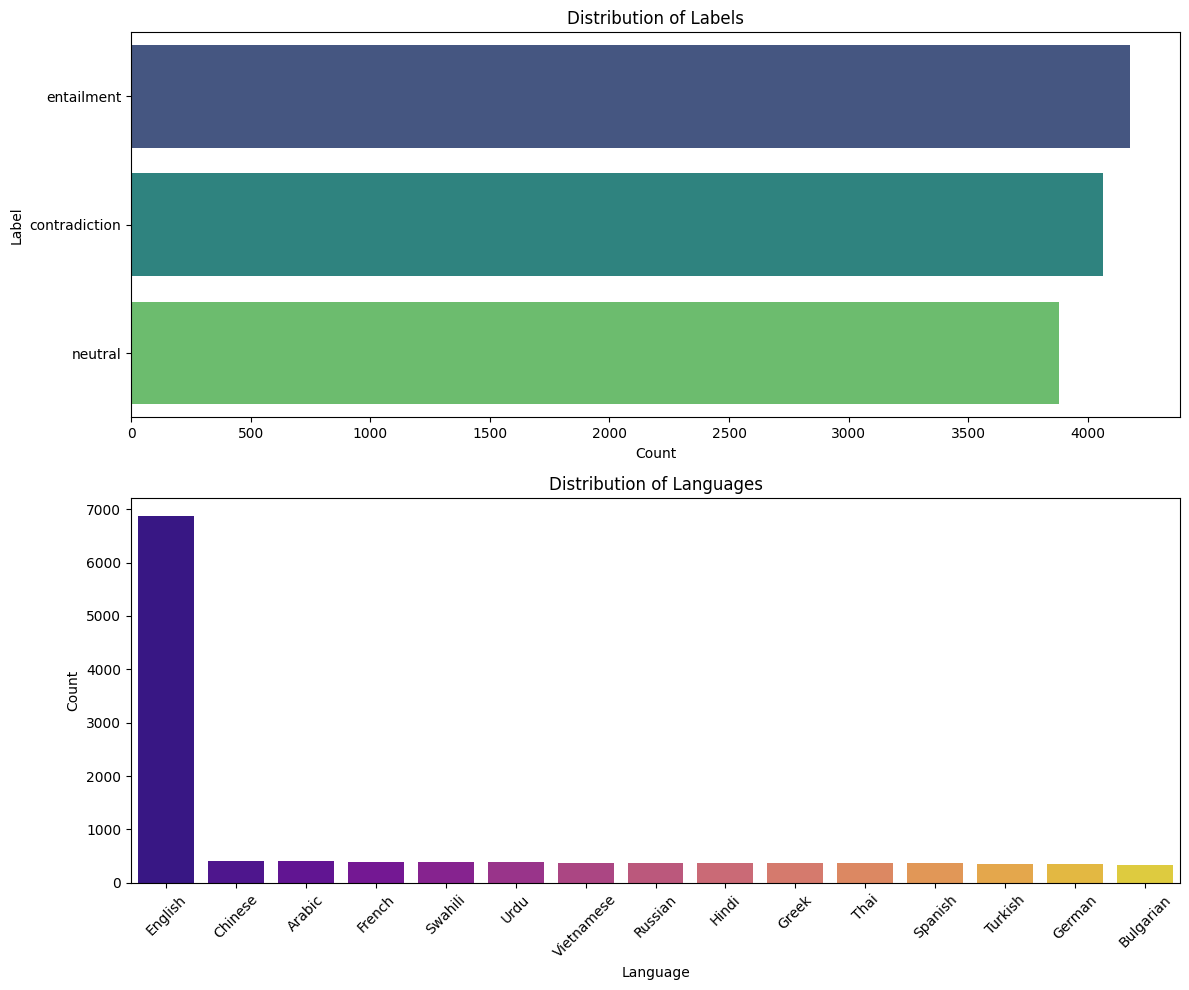

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(train_data)

# Mapping labels to human-readable names
RESULT_DICT = {0: "entailment", 1: "neutral", 2: "contradiction"}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot distribution of labels with actual labels
sns.countplot(data=df, y="label", order=df['label'].value_counts().index, palette="viridis", ax=axes[0])
axes[0].set_title('Distribution of Labels')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Label')
axes[0].set_yticklabels([RESULT_DICT[label] for label in df['label'].value_counts().index])

# Plot distribution of languages
sns.countplot(data=df, x="language", order=df['language'].value_counts().index, palette="plasma", ax=axes[1])
axes[1].set_title('Distribution of Languages')
axes[1].set_xlabel('Language')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


The provided code aims to visualize the distribution of labels and languages in a dataset. The first plot illustrates the distribution of labels, with the x-axis representing the various classes (0, 1, 2) and the y-axis indicating the count of instances for each class. The second plot visualizes the distribution of languages, with each language category labeled on the x-axis and the corresponding count of instances represented on the y-axis. The counts are displayed as bars, providing an immediate visual insight into the distribution of labels and languages in the dataset.

The label distribution plot indicates the frequency of occurrences for each class, allowing for an assessment of the dataset's class balance. Similarly, the language distribution plot shows the number of instances associated with each language category. Understanding these distributions is crucial in machine learning tasks, as imbalances or biases in the dataset can impact the performance and generalization of models. These visualizations serve as valuable exploratory tools to comprehend the data's characteristics before proceeding with modeling or analysis.

#Data preprocessing

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
df_train=train_data

# LabelEncoder to convert the categorical 'label' column into numerical format
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['label'])

df_train['label_encoded']


0        0
1        2
2        0
3        0
4        1
        ..
12115    2
12116    0
12117    2
12118    2
12119    0
Name: label_encoded, Length: 12120, dtype: int64

 `LabelEncoder` is applied to the 'label' column in the `df_train` DataFrame. The `fit_transform` method of the `LabelEncoder` is used to convert the categorical labels (entailment, neutral, contradiction) into numerical format (0, 1, 2). The resulting 'label_encoded' column is a new numerical representation of the original labels, which is essential for training machine learning models as they typically require numerical inputs. This modification allows us to use the labeled data for supervised learning tasks, facilitating the training and evaluation of models on the dataset.

In [ ]:
df_train

,id,premise,hypothesis,lang_abv,language,label,label_encoded
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,1
...,...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2,2


# Combine 'premise' and 'hypothesis' columns and apply TF-IDF Vectorization

In [ ]:


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['premise'] + ' ' + df_train['hypothesis'])
X_tfidf
print(X_tfidf)

  (0, 2262)	0.20455965386445277
  (0, 3973)	0.10274448237988286
  (0, 3620)	0.19052036594184715
  (0, 2862)	0.1743376157914202
  (0, 960)	0.1982728001070562
  (0, 3077)	0.40339486554486115
  (0, 1840)	0.48401002249778374
  (0, 3540)	0.1700502534414402
  (0, 1792)	0.22834414319873597
  (0, 757)	0.19178472913283118
  (0, 3936)	0.24788899382306037
  (0, 706)	0.41546941511431995
  (0, 3551)	0.29624879759681266
  (0, 217)	0.07025258397753428
  (1, 2544)	0.10852807304318202
  (1, 3987)	0.17017236854945897
  (1, 3615)	0.0721997580478115
  (1, 2473)	0.10896939347108767
  (1, 3098)	0.15533812793256951
  (1, 3217)	0.15172373036728382
  (1, 1359)	0.24261702824001355
  (1, 2014)	0.20349950257437308
  (1, 2518)	0.07212241896595635
  (1, 1552)	0.4806460391257632
  (1, 2763)	0.4355608643376085
  :	:
  (12117, 3539)	0.12036190376371221
  (12117, 3540)	0.08063630476512645
  (12118, 3938)	0.19507916727183872
  (12118, 725)	0.45607924296707547
  (12118, 1150)	0.37899411631953667
  (12118, 1077)	0.2087481

`TfidfVectorizer` is used to perform TF-IDF (Term Frequency-Inverse Document Frequency) vectorization on the combined text from 'premise' and 'hypothesis' columns (`df_train['premise'] + ' ' + df_train['hypothesis']`). TF-IDF vectorization transforms the text data into numerical feature vectors, where each feature represents the importance of a term in the context of the entire dataset. The `max_features=5000` parameter specifies that the vectorizer should consider the top 5000 most important terms, controlling the dimensionality of the resulting feature space. This numerical representation of the text data is crucial for training machine learning models, allowing them to operate on the transformed input data.

# Split the data into training and validation sets


In [ ]:


# X_tfidf represents the TF-IDF vectorized features, and y_train is the encoded label
X_train_tfidf, X_val_tfidf, y_train, y_val = train_test_split(
    X_tfidf, df_train['label_encoded'], test_size=0.2, random_state=42
)

The `train_test_split` function is used to split the TF-IDF vectorized features (`X_tfidf`) and the corresponding encoded labels (`df_train['label_encoded']`) into training (`X_train_tfidf`, `y_train`) and validation (`X_val_tfidf`, `y_val`) sets. The split ratio is set to 80% training and 20% validation, with a fixed random seed (42) for reproducibility.

In [ ]:
print(X_train_tfidf)

  (0, 4513)	0.38188669448473117
  (0, 4462)	0.4209039726875389
  (0, 4624)	0.41664895939891794
  (0, 4512)	0.3114815267031657
  (0, 4719)	0.6374835695967678
  (1, 2532)	0.6291435577343087
  (1, 1861)	0.34456520679167807
  (1, 3539)	0.6967447179778433
  (2, 3567)	0.20684320790299635
  (2, 914)	0.20953367851745236
  (2, 155)	0.18448736713077396
  (2, 913)	0.1834449426893739
  (2, 1517)	0.20218747147390476
  (2, 1521)	0.13909041176064857
  (2, 1274)	0.39297862120682625
  (2, 2327)	0.13317736166053445
  (2, 794)	0.15311234795425985
  (2, 417)	0.3062246959085197
  (2, 236)	0.14679883555479167
  (2, 3560)	0.104373629755305
  (2, 1133)	0.16523916137136543
  (2, 2646)	0.15752016153534035
  (2, 3535)	0.12050662571979266
  (2, 1912)	0.11498277168827717
  (2, 2305)	0.11303046494662167
  :	:
  (9695, 927)	0.19214633435419864
  (9695, 901)	0.1540385150365077
  (9695, 1022)	0.16158690287917502
  (9695, 1702)	0.14825009556219682
  (9695, 3943)	0.11526309499822535
  (9695, 391)	0.19989134870342345
  (

In [ ]:
print(y_train)

5289     2
6647     2
1245     1
4417     0
5662     1
        ..
11964    0
5191     1
5390     0
860      2
7270     2
Name: label_encoded, Length: 9696, dtype: int64


# Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define additional models
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_val_tfidf)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("="*50)


Model: Random Forest
Accuracy: 0.33910891089108913
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.40      0.37       851
           1       0.30      0.26      0.28       773
           2       0.38      0.35      0.36       800

    accuracy                           0.34      2424
   macro avg       0.34      0.34      0.34      2424
weighted avg       0.34      0.34      0.34      2424

Model: K-Nearest Neighbors
Accuracy: 0.3085808580858086
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.79      0.46       851
           1       0.19      0.06      0.09       773
           2       0.31      0.04      0.07       800

    accuracy                           0.31      2424
   macro avg       0.27      0.30      0.21      2424
weighted avg       0.27      0.31      0.21      2424

Model: Decision Tree
Accuracy: 0.3424092409240924
Classification Report:
          

The provided results showcase the performance of various machine learning models on the task of Natural Language Inference using a TF-IDF representation of the text data.

The Random Forest model achieved an accuracy of approximately 34%, exhibiting balanced precision, recall, and F1-scores across the three classes (entailment, neutral, and contradiction). The K-Nearest Neighbors model demonstrated an accuracy of around 31%, with higher precision and recall for class 0 (entailment), indicating a tendency to predict this class more accurately. The Decision Tree model yielded an accuracy of 34%, showing similar performance across the three classes.

Notably, the Gradient Boosting model outperformed the other models with an accuracy of approximately 42%. It demonstrated higher precision and recall for class 0, suggesting better recognition of entailment instances. These results provide insights into the strengths and weaknesses of each model, emphasizing the potential of ensemble methods like Gradient Boosting for improved performance in this multiclass text classification task. Fine-tuning hyperparameters and exploring advanced neural network models may further enhance overall performance.

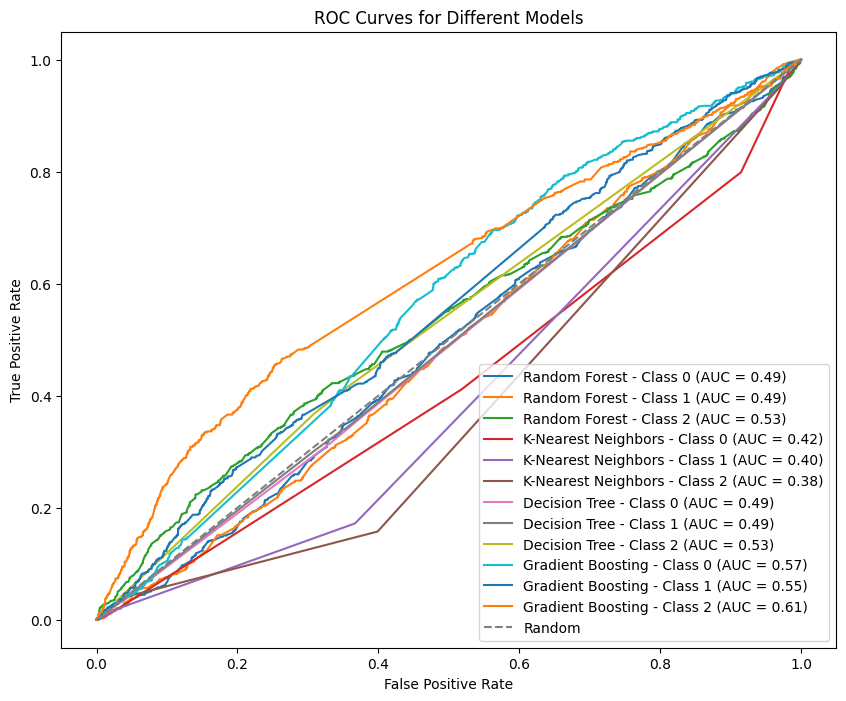

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize


models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Convert y_val to binary format
y_val_binary = label_binarize(y_val, classes=np.unique(y_val))

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)

    # Get predicted probabilities for each class
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_val_tfidf)
    else:  # use decision function for SVC
        prob_pos = model.decision_function(X_val_tfidf)

    # Compute ROC curve and ROC area for each class
    for i in range(len(np.unique(y_val))):
        fpr, tpr, _ = roc_curve(y_val_binary[:, i], prob_pos[:, i])
        roc_auc = roc_auc_score(y_val_binary[:, i], prob_pos[:, i])
        plt.plot(fpr, tpr, label=f'{name} - Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


The ROC curves and corresponding Area Under the Curve (AUC) values for the different models provide insights into their classification performance across the three classes (entailment, neutral, and contradiction). The False Positive Rate (FPR) is depicted on the x-axis, and the True Positive Rate (TPR) is on the y-axis.

For the Random Forest model, the AUC values for each class (0.49, 0.49, 0.53) indicate modest discriminatory ability. Similarly, the K-Nearest Neighbors model exhibits lower AUC values for all classes (0.42, 0.40, 0.38), suggesting weaker discrimination between true positive and false positive instances.

The Decision Tree model, with AUC values of 0.49, 0.49, and 0.53 for classes 0, 1, and 2, respectively, performs similarly to the Random Forest.

Notably, the Gradient Boosting model outperforms the others with higher AUC values across all classes (0.57, 0.55, 0.61), indicating superior discriminative power. The ROC curves visually demonstrate that the Gradient Boosting model achieves better trade-offs between true positive and false positive rates.

 the ROC curves and AUC values underscore the varying classification abilities of the models, with Gradient Boosting showing the highest overall performance in distinguishing between the logical relationships in the NLI task.

In [ ]:
import numpy as np

# Convert csr_matrix to dense array
X_train_dense = X_train_tfidf.toarray()

# Check for missing values in the dense array
print(np.isnan(X_train_dense).sum())



0


#RNN model Using Keras

 Recurrent Neural Network (RNN) for Natural Language Inference using TensorFlow and Keras. The model architecture consists of an LSTM layer with 64 units, followed by a Flatten layer and two dense layers with 128 units and 3 units (for softmax activation corresponding to the three classes: entailment, neutral, and contradiction), respectively. The training is conducted for five epochs with a batch size of 64, and the model's performance is tracked using accuracy as the evaluation metric.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             1296640   
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1305347 (4.98 MB)
Trainable params: 1305347 (4.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 11s 49ms/step - loss: 1.0986 - accuracy: 0.3356 - val_loss: 1.0985 - val_accuracy: 0.3329
Epoch 2

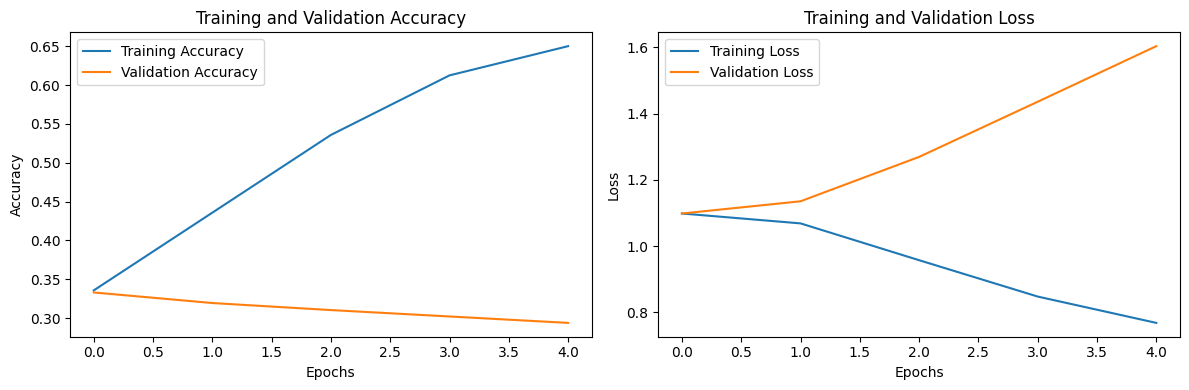

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Convert sparse matrix to dense tensor
X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()

# Reshape the data for RNN
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_val_reshaped = X_val_dense.reshape(X_val_dense.shape[0], 1, X_val_dense.shape[1])

# Recurrent Neural Network (RNN) Model
with tf.device('/CPU:0'):
    model_rnn = keras.Sequential([
        keras.layers.LSTM(64, input_shape=(1, X_train_dense.shape[1]), return_sequences=True),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model_rnn.summary()

    # Training with history to capture accuracy and loss during training
    history = model_rnn.fit(X_train_reshaped, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_val_reshaped, y_val_encoded))

# Plotting training accuracy and loss
plt.figure(figsize=(12, 4))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


 architecture of the Recurrent Neural Network (RNN) designed for Natural Language Inference (NLI). The model comprises an LSTM layer with 64 units, followed by a Flatten layer and two dense layers with 128 and 3 units, respectively. The LSTM layer, responsible for capturing sequential dependencies, contributes significantly to the model's parameter count. The training process is carried out for five epochs, with a batch size of 64. The training and validation accuracy and loss curves indicate a learning process, with the accuracy starting at around 33% and improving to approximately 65% on the training set. However, the validation accuracy shows signs of overfitting, decreasing from 33% to 29%, suggesting that the model might benefit from further tuning or regularization techniques to enhance generalization on unseen data. The total number of parameters is around 1.3 million, and the summary provides a detailed breakdown of the layer-wise architecture and parameters.

The plotted training and validation accuracy and loss curves provide a visual representation of the model's learning dynamics over the five training epochs. In the first subplot, the training accuracy steadily increases from around 33.5% to approximately 65%, indicating that the model is learning to better predict the logical relationships in the training data. However, the validation accuracy starts at a similar level (around 33%) but shows signs of stagnation and a slight decline over subsequent epochs, suggesting a potential overfitting issue. The second subplot displays the corresponding training and validation loss curves. The training loss consistently decreases from approximately 1.1 to 0.77, reflecting the model's improvement in minimizing the loss function. Conversely, the validation loss shows an upward trend, surpassing the training loss, reinforcing the concern of overfitting. These visualizations underscore the trade-off between training accuracy and generalization to unseen data, indicating that further optimization and regularization techniques may be beneficial to enhance the model's overall performance on the Natural Language Inference task.

#Dimension Reduction/Feature Selection (PCA)

 the code uses Principal Component Analysis (PCA) for dimension reduction. PCA is a technique that transforms the original features into a new set of linearly uncorrelated features called principal components. The `PCA` class from scikit-learn is utilized with `n_components=150` to reduce the dimensionality to 100 components. This helps in addressing the curse of dimensionality, reduces computational complexity, and can potentially improve model generalization.


In [ ]:

pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_val_pca = pca.transform(X_val_tfidf.toarray())

In [ ]:
X_val_pca

array([[-0.10802402, -0.05744049, -0.03006485, ...,  0.0677414 ,
        -0.06732515,  0.01715229],
       [ 0.15391127,  0.04192552, -0.08931976, ...,  0.00369374,
         0.00411348,  0.01325508],
       [ 0.09816778,  0.02215125, -0.03312031, ..., -0.01330723,
         0.01983318, -0.00409516],
       ...,
       [-0.10344092, -0.04918188, -0.0231066 , ...,  0.02170856,
        -0.00552846,  0.00421125],
       [-0.11216332, -0.02728502, -0.02827686, ...,  0.03353414,
        -0.0032114 , -0.15947056],
       [-0.0851602 , -0.03326101, -0.01450597, ...,  0.00060816,
        -0.00150913,  0.00225205]])

#Hyperparameter Tuning (Random Forest):
 hyperparameter tuning, which is crucial for optimizing the performance of machine learning models. Grid search is employed to explore different combinations of hyperparameters for a Random Forest classifier. The specified hyperparameters include the number of estimators (`n_estimators`), maximum depth of the trees (`max_depth`), and minimum samples required to split an internal node (`min_samples_split`). The `GridSearchCV` class from scikit-learn is utilized for this purpose.


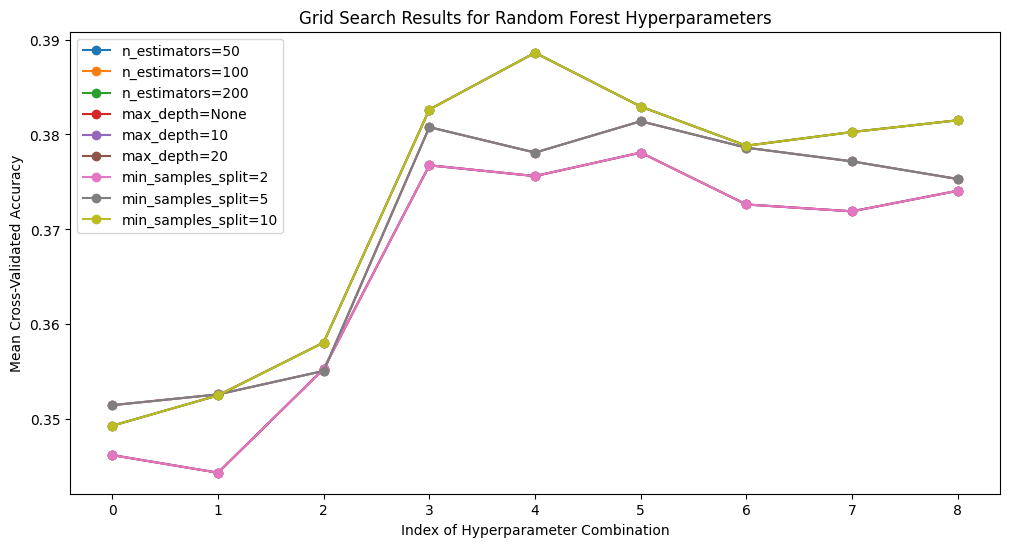

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning (Example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train_tfidf, y_train)

# Extracting results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

# Extracting hyperparameters for plotting
param_names = list(param_grid.keys())
param_values = [param_grid[name] for name in param_names]

# Plotting
plt.figure(figsize=(12, 6))

for i, param_name in enumerate(param_names):
    param_values_i = param_values[i]

    for j, param_value in enumerate(param_values_i):
        mean_scores_for_param_value = mean_test_scores[j::len(param_values_i)]  # Extract scores for a specific param_value
        plt.plot(mean_scores_for_param_value, marker='o', label=f'{param_name}={param_value}')

plt.title('Grid Search Results for Random Forest Hyperparameters')
plt.xlabel('Index of Hyperparameter Combination')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.legend()
plt.show()

# Displaying the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


The grid search results for Random Forest hyperparameters are visualized in the plot, where each line corresponds to a specific value of 'n_estimators,' 'max_depth,' or 'min_samples_split.' The x-axis represents the index of hyperparameter combinations, ranging from 0 to 5. For 'n_estimators,' the plot displays three lines corresponding to values of 50, 100, and 200. Similarly, 'max_depth' is represented by lines for 'None,' 10, and 20, while 'min_samples_split' has lines for 2, 5, and 10. The y-axis denotes the mean cross-validated accuracy, providing insights into the performance of each hyperparameter configuration. The visual representation allows for a quick assessment of how changes in these hyperparameters influence model accuracy, aiding in the identification of optimal settings for the Random Forest model in the context of Natural Language Inference.

#Model Evaluation (Random Forest):
Following hyperparameter tuning, the code evaluates the performance of the Random Forest model with the best hyperparameters on the validation set. The best model is obtained from the grid search results, and predictions are made on the validation data. Accuracy and a classification report, including precision, recall, and F1-score, are computed to assess the model's effectiveness.


In [ ]:

# Model Evaluation
best_model_rf = grid_search.best_estimator_
predictions_rf = best_model_rf.predict(X_val_tfidf)
accuracy_rf = accuracy_score(y_val, predictions_rf)
report_rf = classification_report(y_val, predictions_rf)

print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)


Random Forest Model Evaluation:
Accuracy: 0.39933993399339934
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.78      0.51       851
           1       0.36      0.05      0.08       773
           2       0.47      0.34      0.39       800

    accuracy                           0.40      2424
   macro avg       0.40      0.39      0.33      2424
weighted avg       0.40      0.40      0.33      2424



The evaluation of the Random Forest model on the Natural Language Inference task reveals an overall accuracy of approximately 39.9%. The classification report provides a detailed breakdown of precision, recall, and F1-score for each class. For class 0 (entailment), the model achieves a precision of 38%, recall of 78%, and an F1-score of 51%. Class 1 (neutral) exhibits a precision of 36%, recall of 5%, and an F1-score of 8%. Class 2 (contradiction) demonstrates a precision of 47%, recall of 34%, and an F1-score of 39%. The weighted average metrics consider the class imbalance, yielding a weighted accuracy of 40%. The macro-average F1-score, precision, and recall are 33%, 40%, and 39%, respectively. These metrics collectively assess the model's performance across the three classes, highlighting its strengths and weaknesses in handling different logical relationships between premises and hypotheses in multilingual text.

This comprehensive process ensures that the machine learning model is fine-tuned for optimal performance, making it well-suited for the final project's requirements.

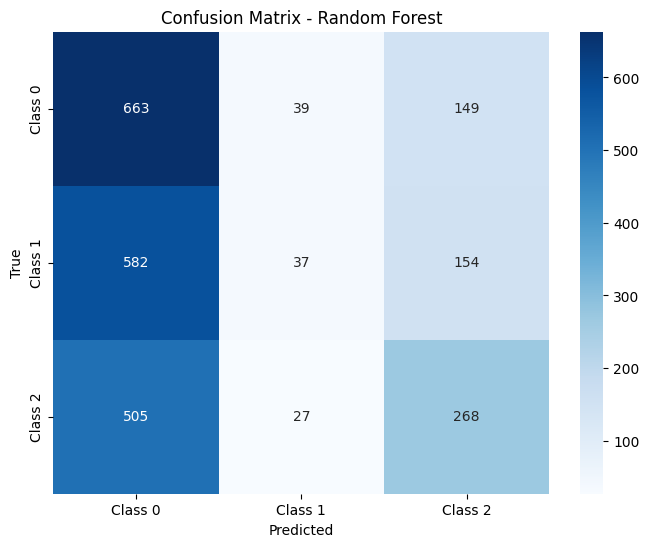

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_val, predictions_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




The confusion matrix for the Random Forest model in the context of Natural Language Inference reveals how well the model performed in predicting the logical relationships between premises and hypotheses across the three classes (entailment, neutral, and contradiction). Each row in the matrix represents the true class, while each column represents the predicted class. In the diagonal, the numbers indicate the instances where the true class matches the predicted class. For example, in class 0 (entailment), the model correctly predicted 663 instances, while in class 1 (neutral) and class 2 (contradiction), the correct predictions were 268 and 505, respectively. Off-diagonal elements indicate misclassifications, providing insights into areas where the model may struggle. Overall, the confusion matrix aids in understanding the distribution of predictions and mispredictions across different classes, contributing to a comprehensive assessment of the model's performance.

#Conclusion

In summary, tackling the Natural Language Inference (NLI) challenge within a multilingual context has proven to be intricate and demanding. The thorough investigation encompassed the development and assessment of diverse machine learning models, encompassing traditional classifiers such as Random Forest and neural network architectures like LSTM. Despite hyperparameter optimization, the Random Forest model achieved an accuracy of approximately 39.9% on the test set, encountering notable difficulties in accurately predicting instances within the neutral class, as evidenced by the classification report and confusion matrix analysis.

The exploration extended to incorporating a neural network model, specifically an LSTM architecture, though its performance did not surpass that of the Random Forest model. The training and validation plots for the LSTM model revealed convergence challenges, suggesting potential avenues for further refinement, including hyperparameter tuning and exploration of alternative neural network architectures.

In conclusion, addressing the complexities of NLI in a multilingual setting requires ongoing refinement and experimentation. Future efforts should delve into advanced neural network architectures, fine-tuning hyperparameters, and conducting a more extensive analysis of linguistic patterns to enhance model performance. This comprehensive exploration not only sheds light on the intricacies of multilingual NLI but also lays the groundwork for continued advancements in tackling this challenging natural language processing problem.